### Шаг 1. Открыть файл с данными и изучить общую информацию
Прочитаем файл **marketing.csv** и сохраним его в переменной **marketing**

In [2]:
#Ипорт основных библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [3]:
# Загрузка данных из CSV-файла и преобразование столбцов с датами
marketing = pd.read_csv('data\marketing.csv', parse_dates= ['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


Рассмотрим общую информация о данных таблицы **marketing**

In [4]:
#  Вывод общец информации о таблице marketing
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


Увидим, что в таблце 12 столбцов:
- **user_id**: уникальный идентификационный номер пользователя
- **date_served**: дата выполнения действия
- **marketing_channel**: канал распространения рекламы
- **variant**: вариант показанной рекламы (для проведения A/B-теста)
- **converted**: указывает, стал ли пользователь платным подписчиком
- **language_displayed**: язык, на котором была представлена реклама
- **language_preferred**: предпочитаемый пользователем язык
- **age_group**: категория возраста
- **date_subscribed**: дата подписки
- **date_canceled**: дата отмены подписки
- **subscribing_channel**: канал, через который пользователь подписался на рассылку
- **is_retained**: показатель удержания клиента

Также заметим, что у стобцов "converted" и "is_retained" не подходящий тип данных.
Кроме того, отметим пропуски значений в стобцах "converted" и "date_served". 
Отличие количества записей в столбце "date_canceled" адекватно, так как не все пользователи отменяют подписку.

Проверим датасет на дубликаты

In [5]:
# Выведем количество дубликатов
print(f'Количество дубликатов: {marketing.duplicated().sum()}')
# Выведем дублированные строки вместе с оригинальной строкой для анализа
duplicates = marketing[marketing.duplicated( keep=False)]
with pd.option_context('display.max_rows', None):
    display(duplicates.head())

Количество дубликатов: 37


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
469,a100000629,2018-01-15,Email,personalization,True,English,English,0-18 years,2018-01-15,NaT,Email,True
470,a100000629,2018-01-15,Email,personalization,True,English,English,0-18 years,2018-01-15,NaT,Email,True
477,a100000633,2018-01-15,Email,personalization,True,English,English,0-18 years,2018-01-15,NaT,Email,True
478,a100000633,2018-01-15,Email,personalization,True,English,English,0-18 years,2018-01-15,NaT,Email,True
890,a100000883,2018-01-02,House Ads,control,False,English,English,55+ years,2018-01-15,NaT,Instagram,True


Проверим количество пропусков

In [6]:
# Вывод количества попущенных данных
marketing.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

Видим, что у нас 37 дубликатов. По таблице можно понять, что в данных скорее всего произошла ошибка и некоторые значения продублировались, поэтому мы можем спокойно их удалить.

**Вывод:** нужно изменить тип данных 2 столбцов, удалить 37 дубликатов и 16 пропусков.

## Шаг 2. Предобработка данных
Выполним обработку пропусков, изменим типы данных и удалим дубликаты. 

Изменим типы данных у столбцов "converted" и "is_retained"

In [7]:
# Преобразование типов данных столбцов
marketing = marketing.astype({'converted' : bool, 'is_retained' : bool})

Проверим, что типы данных изменились

In [8]:
# Вывод типов данных столбцов
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                        bool
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                      bool
dtype: object

Типы данных изменились, можно преступать к удалению пропусков, которых 16, что не сильно скажется на массиве данных

In [9]:
# Удаление строк с пустыми значениями в столбце 'date_served'
marketing = marketing.dropna(subset = ['date_served'])

Убедимся, что пустые значения пропали

In [10]:
# Вывод количества попущенных данных
marketing.isna().sum()

user_id                   0
date_served               0
marketing_channel         0
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8165
date_canceled          9444
subscribing_channel    8165
is_retained               0
dtype: int64

Пропуски были удалены, можно преступать к удалению дубликатов

In [11]:
# Удаление дубликатов
marketing = marketing.drop_duplicates()

Убедимся, что дубликаты пропали

In [12]:
# Вывод количества дубликатов
print(f'Количество дубликатов: {marketing.duplicated().sum()}')

Количество дубликатов: 0


**Вывод:** была выполнена обработка пропусков, изменены типы данных и удалены дубликаты. 

## Шаг 3. Анализ данных
Перейдем к анализу, рассмотрим общую динамику пользователей, которым показывают рекламу и платных подписчиков, рассчитаем метрки конверсии и коэффициента удержания. Рассмотрим конверсию с для разных категорий данных.


### Подшаг 1. Рассмотрим общую динамику всех пользователей и платных подписчиков. Расчитаем общую конверсию и коэффициент удержания.

Перенесем созданную во время анализа функцию построения графиков в начало, чтобы избежать лишнего написания кода

In [57]:
# Построение функции для создания графиков
def plotting_conv(dataframe, label_type):
    # Вычисление количества столбцов и строк для размещения графиков
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2
    # Создание фигуры и массива подграфиков
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    
    # Если только одна строка, переформировать массив подграфиков
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Цикл для построения графиков для каждого столбца
    for i, column in enumerate(dataframe.columns):
        row = i // 2  # Вычисление индекса строки
        col = i % 2   # Вычисление индекса столбца
        
        # Построение графика данных из столбца
        ax = axes[row, col]  # Получение текущего подграфика
        
        # Преобразование дат в числовой формат для аппроксимации линии тренда
        numeric_dates = np.arange(len(dataframe.index))
        coefficients = Polynomial.fit(numeric_dates, dataframe[column], 1)
        trend_line = coefficients(numeric_dates)
        ax.plot(dataframe.index, trend_line, color='blue', label='Trend Line', linestyle='--')
        
        # Построение линии тренда
        ax.plot(dataframe.index, dataframe[column], color='#118DFF')
        
        # Заголовок и подписи осей в зависимости от типа графика
        if label_type == 0:
            ax.set_title(f'Daily {column.replace("_", " ")} conversion rate', size=16)
            ax.set_ylabel('Conversion rate', size=14)
        else:
            if isinstance(column, tuple) == True:
                ax.set_title(f'Daily {" ".join([item.replace("_", " ") for item in column])} number', size=16)
                ax.set_ylabel('Number of ' + str(column[1].replace("_", " ")), size=14)
            else:
                ax.set_title(f'Daily {column} number', size=16)
                ax.set_ylabel('Number of ' + str(column), size=14)
            
        ax.set_xlabel('Date', size=14)
        ax.tick_params(axis='x', rotation=45)

    # # Удаление лишних подграфиков, если количество столбцов нечетное
    for i in range(num_columns, num_rows * 2):
        if i < num_rows * 2:
            fig.delaxes(axes.flatten()[i])

    # Оптимизация расположения элементов на графике и его вывод
    plt.tight_layout()
    plt.show()
    plt.clf()

Рассмотрим общую динамику всех пользователей

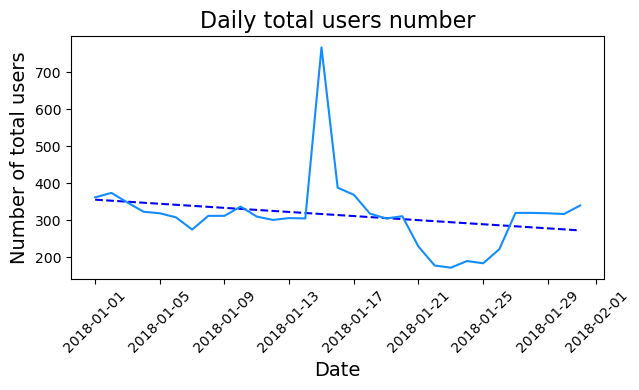

<Figure size 640x480 with 0 Axes>

In [14]:
# Группировка по 'date_served' и подсчет уникальных 'user_id'
daily_users = marketing[['user_id', 'date_served']].groupby('date_served').nunique().rename(columns= {'user_id' : 'total users'})
plotting_conv(daily_users, 1)

Рассмотрим общую динамику платных подписчиков

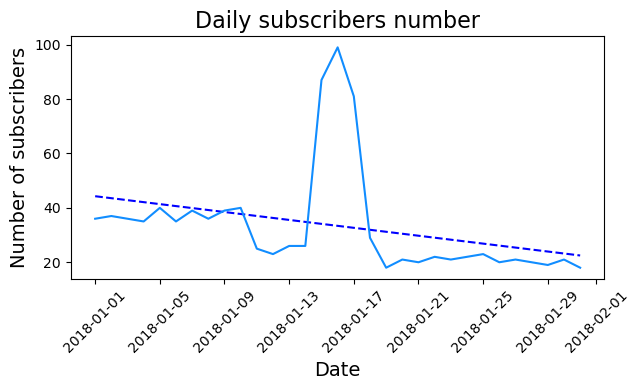

<Figure size 640x480 with 0 Axes>

In [15]:
# Группировка по 'date_served' и подсчет уникальных 'user_id'
daily_subscribers = marketing.query('converted == True')[['user_id', 'date_served']].groupby('date_served').nunique().rename(columns= {'user_id' : 'subscribers'})
plotting_conv(daily_subscribers, 1)

Рассчитаем общую конверсию по дням

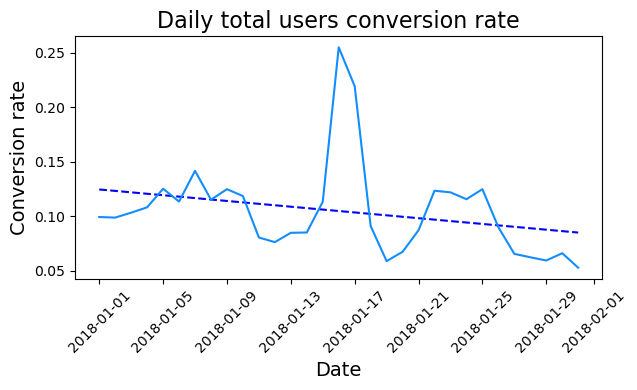

<Figure size 640x480 with 0 Axes>

In [58]:
# Расчет конверсии по дням
conversion_total_daily = marketing.groupby('date_served').agg({'user_id' : 'nunique'})
conversion_subscribers_daily = marketing.query('converted == True').groupby('date_served').agg({'user_id' : 'nunique'})
conversion_rate_daily = conversion_subscribers_daily / conversion_total_daily
conversion_rate_daily = conversion_rate_daily.rename(columns = {'user_id' : 'total_users'})
plotting_conv(conversion_rate_daily, 0)

Рассчитаем общую конверсию

In [16]:
# Подсчет общего числа пользователей
total = marketing['user_id'].nunique()

# Подсчет числа подписавшихся пользователей
subscribers = marketing.query('converted == True')['user_id'].nunique()

# Расчет конверсии
conversion_rate = subscribers/total
print(f'Total conversion rate : {round(conversion_rate * 100, 2)}%')

Total conversion rate : 13.92%


Рассчитаем общий коэфициент удержания

In [17]:
# Подсчет общего числа платных подписчиков
total_subscribers = marketing.query('converted == True')['user_id'].nunique() 

# Подсчет числа пользователей, оставшихся подписанными
retained = marketing.query('is_retained == True & converted == True')['user_id'].nunique()

# Расчет коэффициента удержания
retention_rate = retained/total_subscribers
print(f'Retention_rate:  {round(retention_rate*100, 2)}%')

Retention_rate:  67.09%


**Вывод:** видим, что согласно линии тренда и у общего числа пользователей, которым показана реклама, и у платных подписчиков тенденция к снижению, соответсвенно такая же тенденция на снижения и у конверсии. Также заметно резкое увеличение пользователей и платных подписчиков в период с 15 по 15 января. Общая конверсия: **13,92%**. Общий коэффциент удержания: **67.09%**. 


### Подшаг 2. Проведем анализ числа пользователей, чтобы узнать, что привело к увеличению просмотров рекламы.

Для этого создадим функцию, которая на выход будет выдавать число общих пользователей и число платных подписчиков в разбивке по задаваемой категории.

In [18]:
# Создание функции для расчета общего числа пользователей и числа платных подписчиков
def number_of(dataframe, column_names):
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    number_of_df = pd.DataFrame({'subscribers' : column_conv, 'total_users' : column_total})
    number_of_df = number_of_df.unstack(level = 1).fillna(0).swaplevel(axis=1).sort_index(axis=1)
    return number_of_df

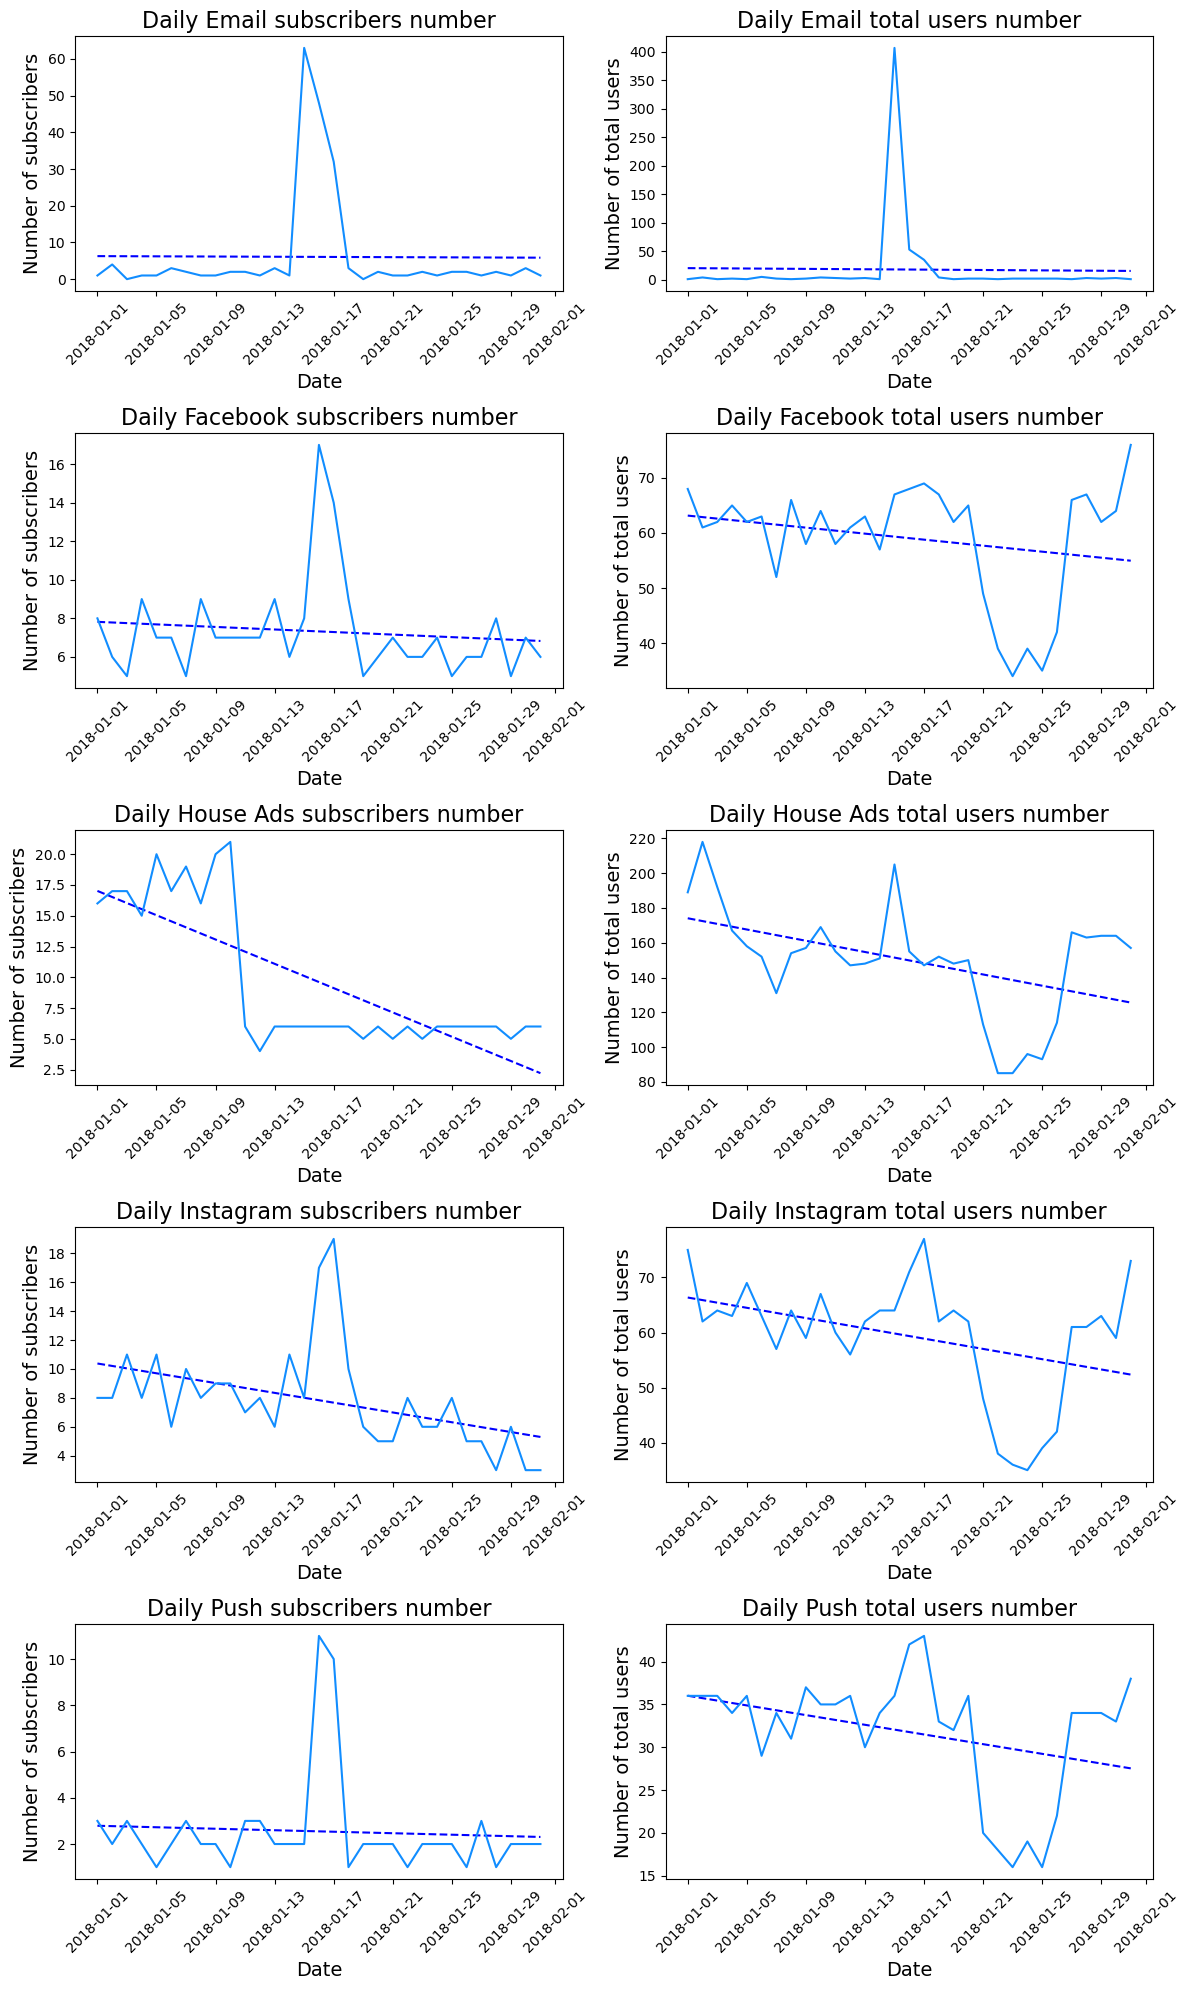

<Figure size 640x480 with 0 Axes>

In [19]:
plotting_conv(number_of(marketing, ['date_served', 'marketing_channel']), 1)

**Вывод:** как видно, общее количество платных подписчиков и пользователей, которым показали рекламу выросло за счёт того, что в этот промежуток времени значительно увеличилось число пользователей, которым отправили рассылку по электронной почте. Также сразу заметим резкое уменьшение числа платых подписчиков c 11 января в House Ads и резкое увеличение платных подписчиков в других каналах в период с 15 по 16 января т.е период рассылки. 


Далее создадим функцию для расчета конверсии по категориям.

In [20]:
# Создание функции для расчета конверсии
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate = column_conv/column_total
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

Посмотрим на конверсию по разным категориям пользователей, чтобы найти причину этой тенденции.

Рассчитаем конверсию по каналам продвижения

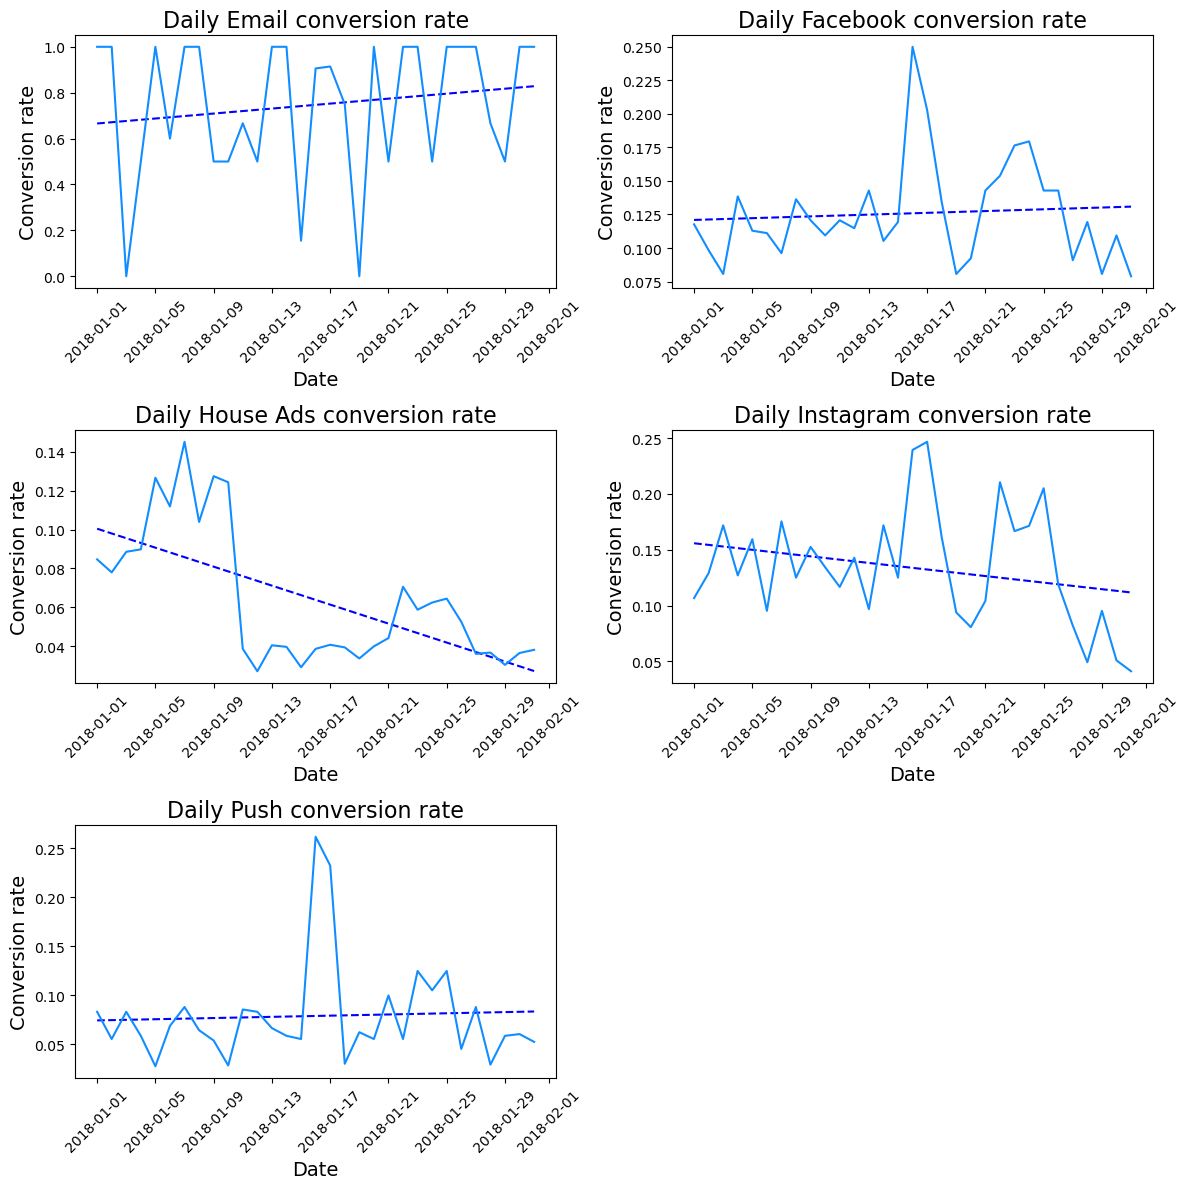

<Figure size 640x480 with 0 Axes>

In [22]:
# Расчет конверсии по дням и каналу продвижения
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])
daily_conv_channel_df = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Построение графика
plotting_conv(daily_conv_channel_df, 0)

Рассчитаем конверсию по языкам пользователей

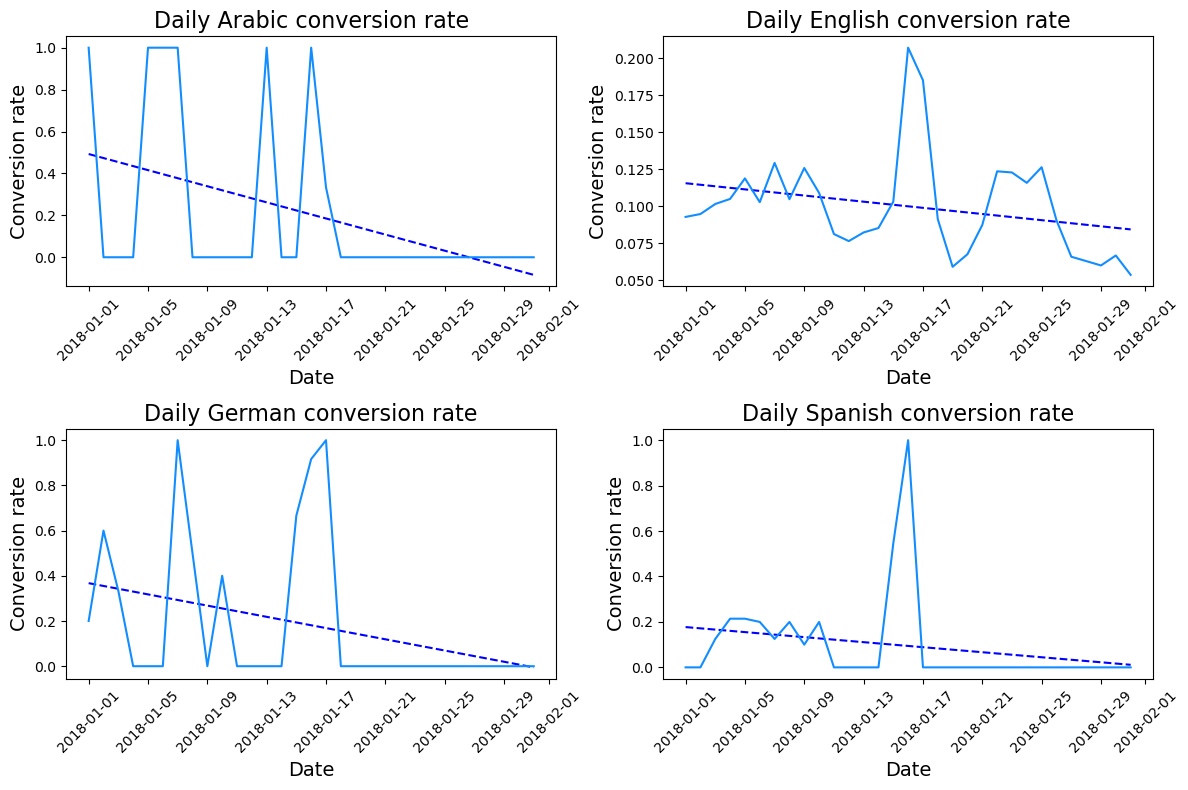

<Figure size 640x480 with 0 Axes>

In [23]:
# Расчет конверсии по дням и каналу продвижения
conversion_rate_language_displayed_daily = conversion_rate(marketing, ['date_served', 'language_displayed'])
conversion_rate_language_displayed_daily_df = pd.DataFrame(conversion_rate_language_displayed_daily.unstack(level = 1).fillna(0))

# Построение графика
plotting_conv(conversion_rate_language_displayed_daily_df, 0)

Рассчитаем конверсию по возрастным группам

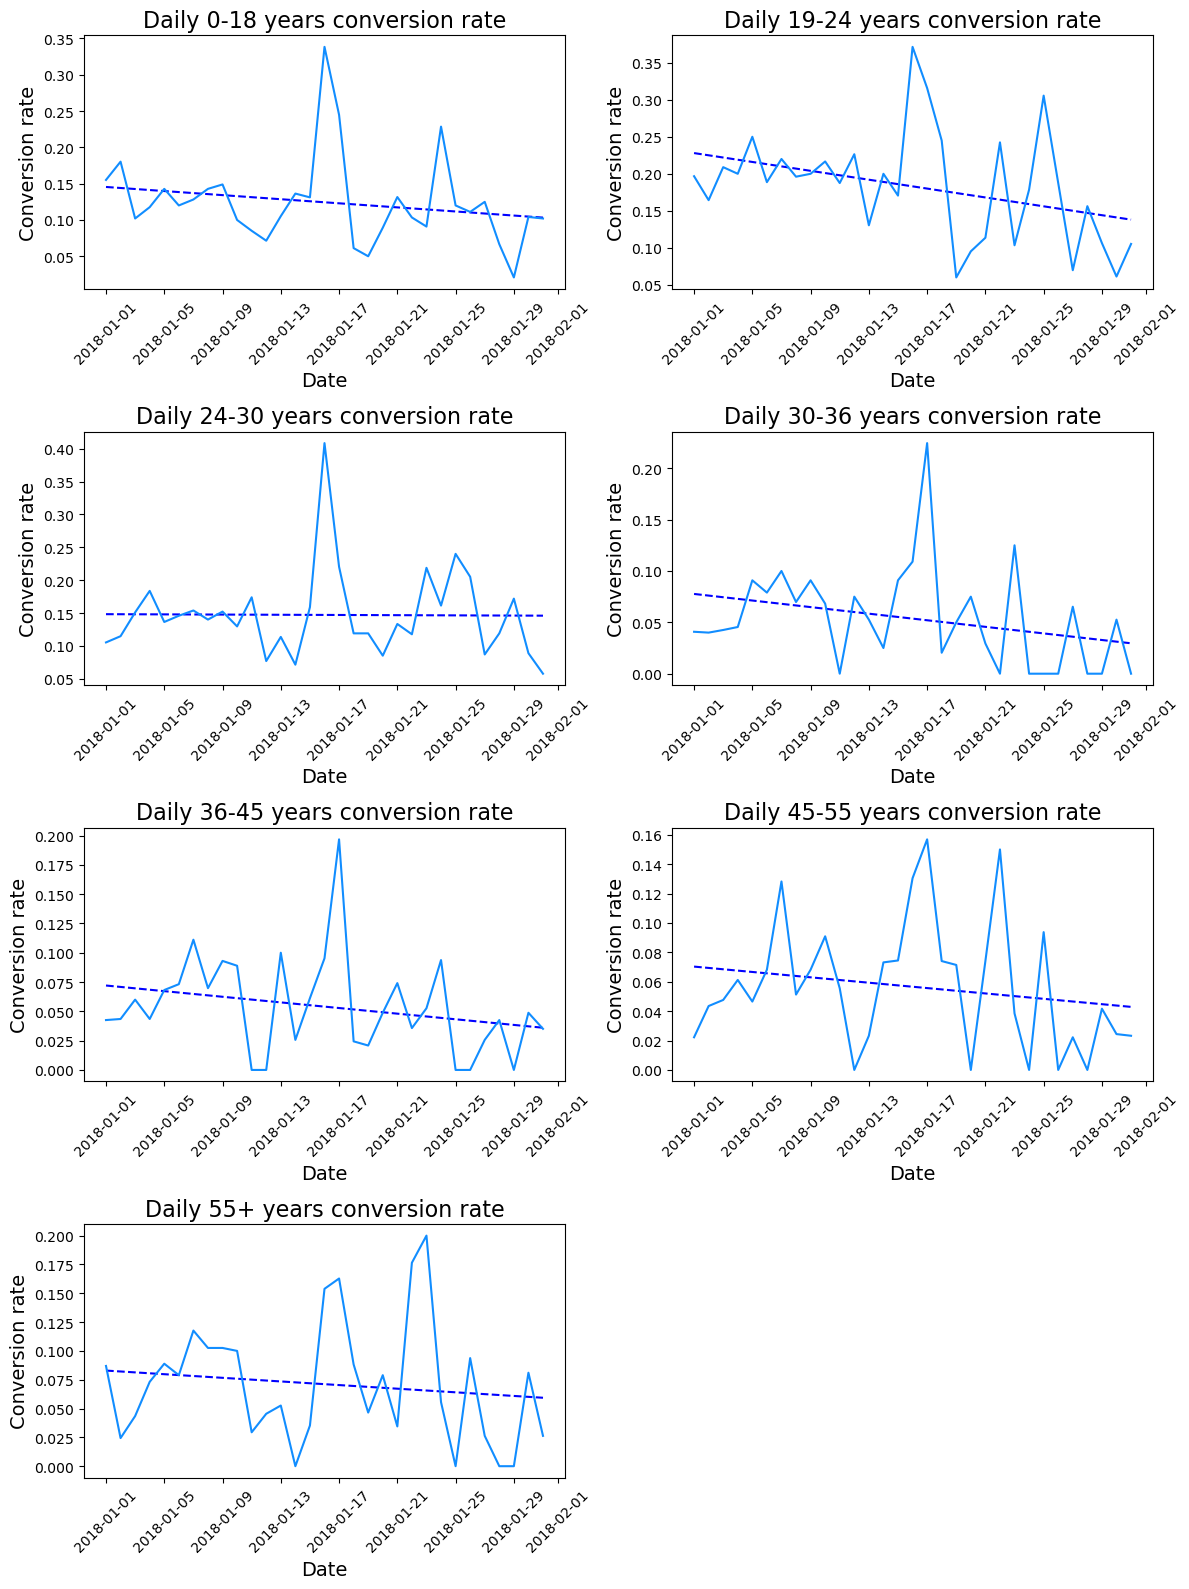

<Figure size 640x480 with 0 Axes>

In [24]:
# Расчет конверсии по дням и каналу продвижения
conversion_rate_age_group_daily = conversion_rate(marketing, ['date_served', 'age_group'])
conversion_rate_age_group_daily = pd.DataFrame(conversion_rate_age_group_daily.unstack(level = 1).fillna(0))

# Построение графика
plotting_conv(conversion_rate_age_group_daily, 0)

Рассчитаем конверсию по типу показанных объявлений

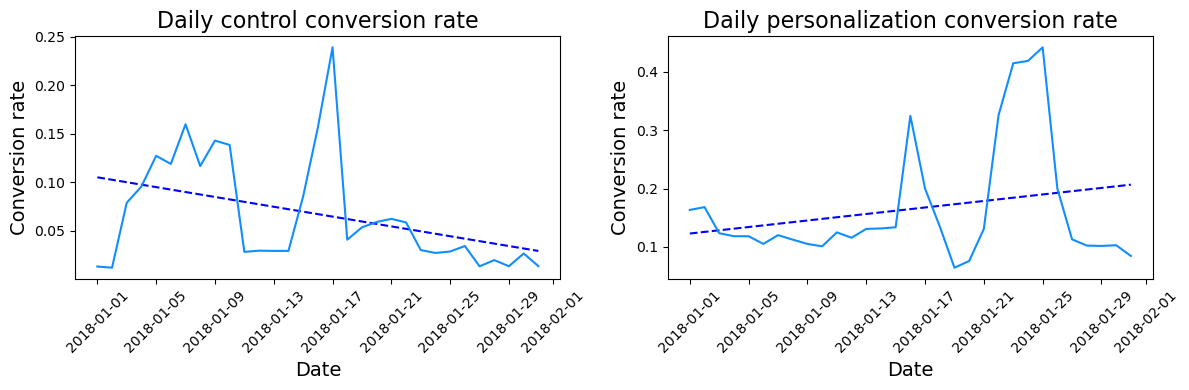

<Figure size 640x480 with 0 Axes>

In [25]:
# Расчет конверсии по дням и каналу продвижения
conversion_rate_variant_daily = conversion_rate(marketing, ['date_served', 'variant'])
conversion_rate_variant_daily_df = pd.DataFrame(conversion_rate_variant_daily.unstack(level = 1).fillna(0))

# Построение графика
plotting_conv(conversion_rate_variant_daily_df, 0)

Проанализируем, не влияет ли на конверсию день недели

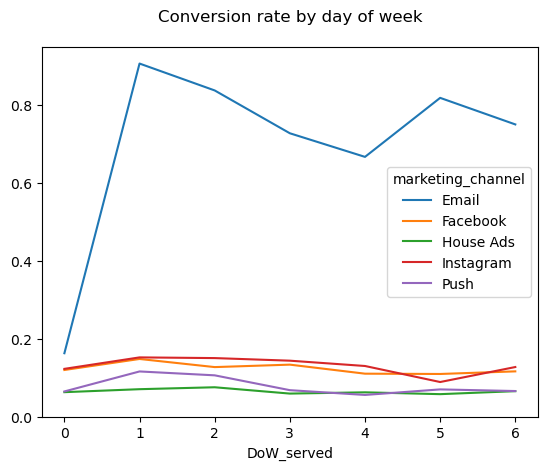

In [26]:
# Добавление столбца 'DoW_served' с днем недели из столбца 'date_served'
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Расчет конверсии по дню недели
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Построение графика
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

**Вывод:** проанализировав конверсию по разным категориям пользователей, видно, что во всех категориях пользователей идет увеличение конверсии в промежуток масштабной рассылки по элктронной почте, поэтому по категориям пользователей нельзя выявить отдельную группу с резким повышением, вызвала бы собой резкое повышение общей конверсии с 15 по 16 января. Также проверка изменчивости конверсии по дню недели не показала значительных результатов, кроме того, что минимальная конверсия у рассылок по электронной почте в понедельник.

Сформулируем предположение, что увеличение конверсии выросло за счет пользователей, совершивших повторную покупку т.е удержанных пользователей. Рассчитаем число таких пользователей. 

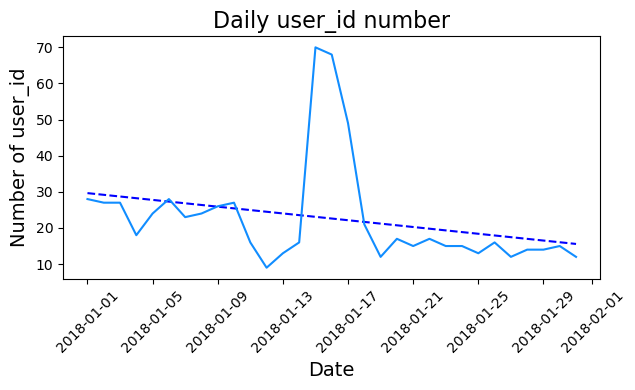

<Figure size 640x480 with 0 Axes>

In [27]:
# Расчет количества удержанных платных подписчиков
retained_subscribers = marketing[(marketing['converted'] == True) & (marketing['is_retained'] == True)]
retained_subscribers_daily = retained_subscribers.groupby('date_served').agg({'user_id' : 'nunique'})
plotting_conv(retained_subscribers_daily, 1)

**Вывод:** как видно, количество платных подписчиков среди удержанных пользователей резко возросло в период рассылки, что и сказалось на общем росте платных подписчиков и конверсии в следствие. Тот факт, что рост количества платных подписчиков среди удержанных пользователей в период проведения рассылки может указывать на то, что 15-16 января был периодом окончания платной подписки у пользователей и им либо разослали письма с призывом продлить подписку либо такие письма-напоминания приходят автоматически.

### Подшаг 3. Анализ спада конверсии канала продвижения house ads.

Выведем конверсию по каналу продвижения House Ads

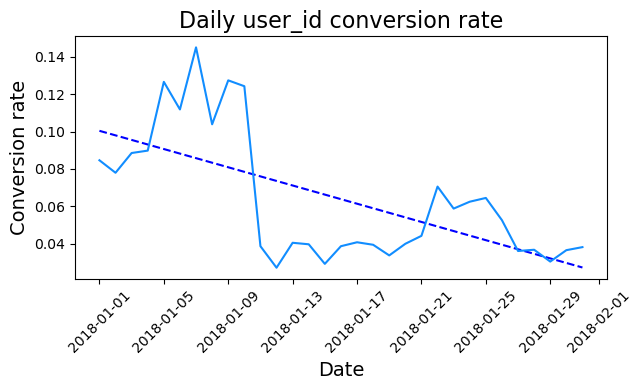

<Figure size 640x480 with 0 Axes>

In [28]:
# Выделение канала продаж House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']
# Расчет конверсии
house_ads_conversion_rate = pd.DataFrame(conversion_rate(house_ads, 'date_served'))
plotting_conv(house_ads_conversion_rate, 0)

Проверим, что могло повлиять на конверсию с помощью анализа пользователей по группам

Проведем анализ показываемого языка

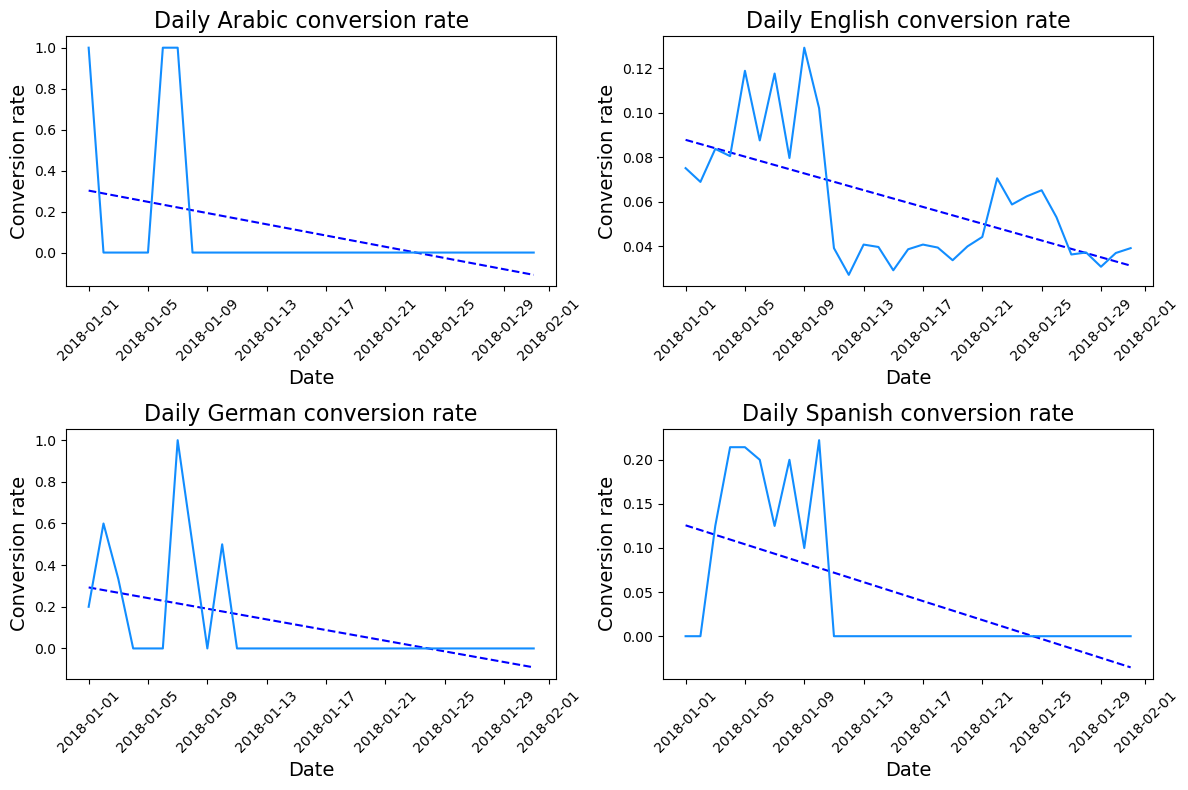

<Figure size 640x480 with 0 Axes>

In [29]:
# Расчет конверсии по 'date_served' и 'language_displayed'
hosue_ads_conv_lang_channel = conversion_rate(house_ads, ['date_served', "language_displayed"])
hosue_ads_conv_lang_channel_df = pd.DataFrame(hosue_ads_conv_lang_channel.unstack(level=1)).fillna(0)
# Построение графиков
plotting_conv(hosue_ads_conv_lang_channel_df, 0)

Проведем анализ по возрасту пользователей

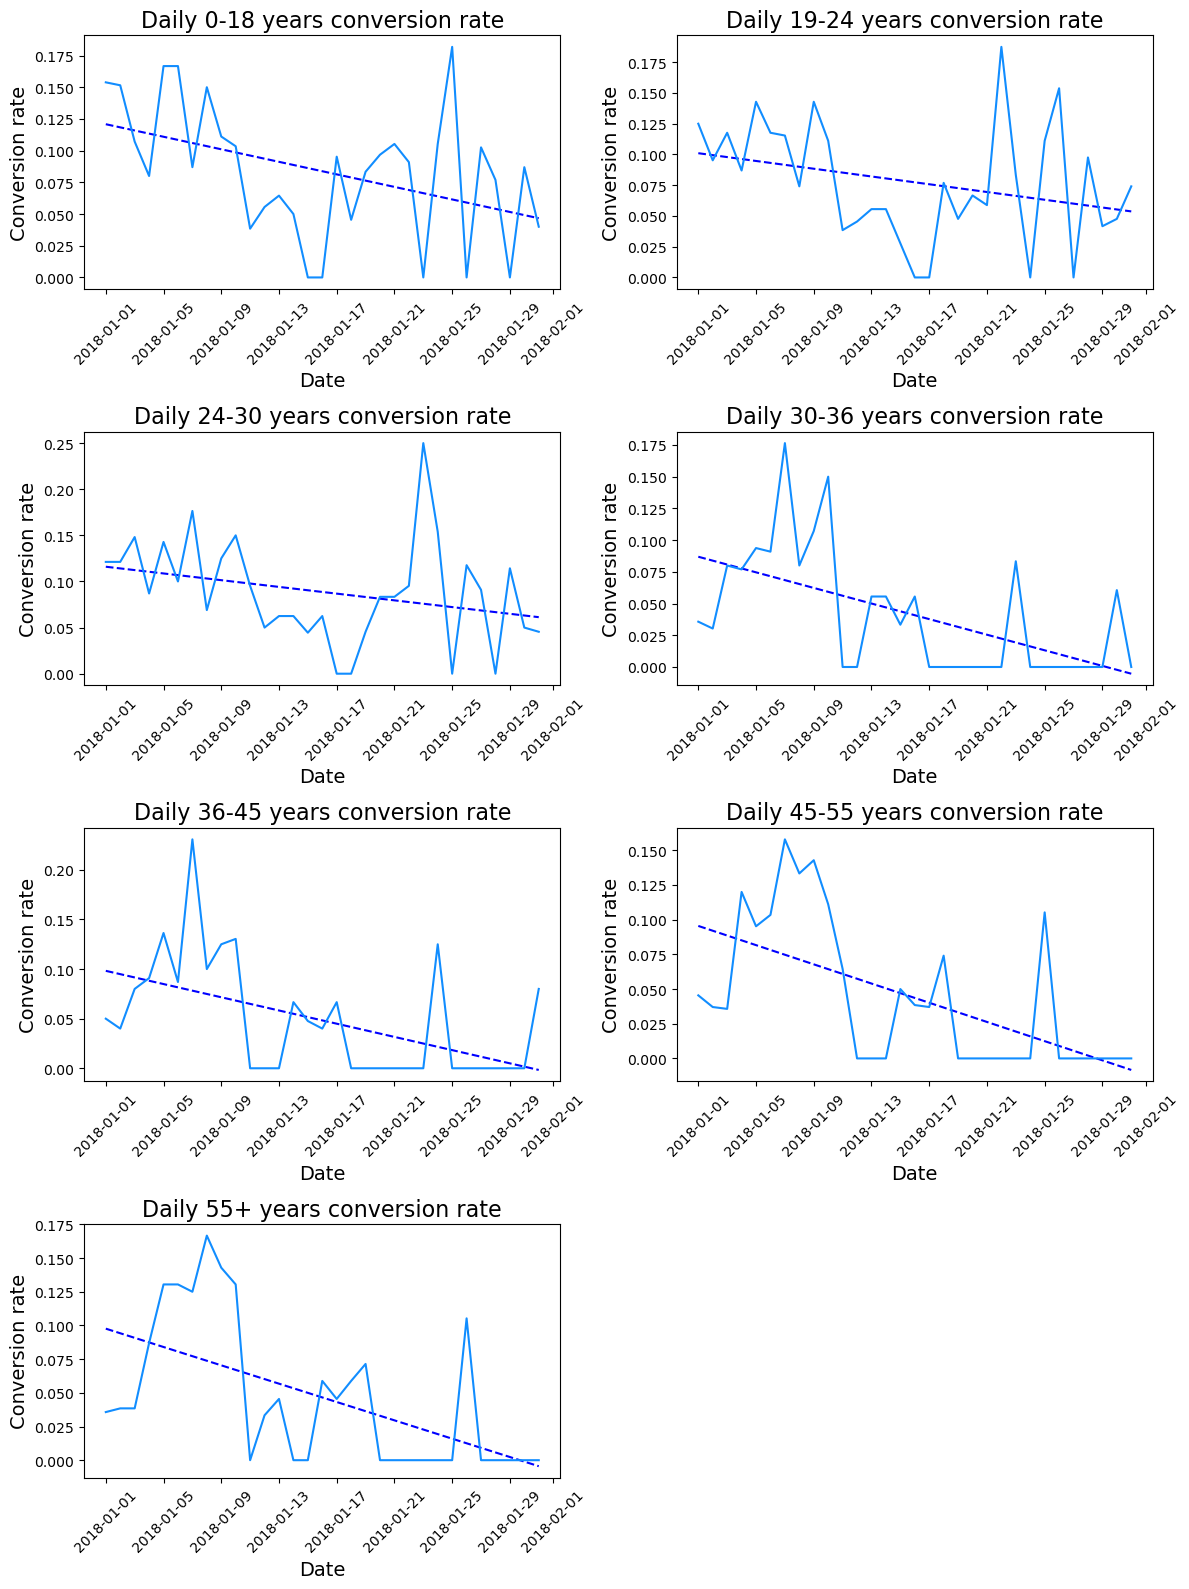

<Figure size 640x480 with 0 Axes>

In [30]:
# Расчет конверсии по 'date_served' и 'language_displayed'
hosue_ads_conv_age_group = conversion_rate(house_ads, ['date_served', "age_group"])
hosue_ads_conv_age_group_df = pd.DataFrame(hosue_ads_conv_age_group.unstack(level=1)).fillna(0)
# Построение графиков
plotting_conv(hosue_ads_conv_age_group_df, 0)

**Вывод:** увидим резкий спад конверсии по всем показываемым языкам, кроме английского, нужно проверить, нет ли ошибки в отображении языка: отображается язык, отличающийся от предпочтительного.

Введем столбец с проверкой соотношений выбранного и показываемого языков

C:\Users\Тимофей\AppData\Local\Temp\ipykernel_20340\4010176386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'],'Yes', 'No')


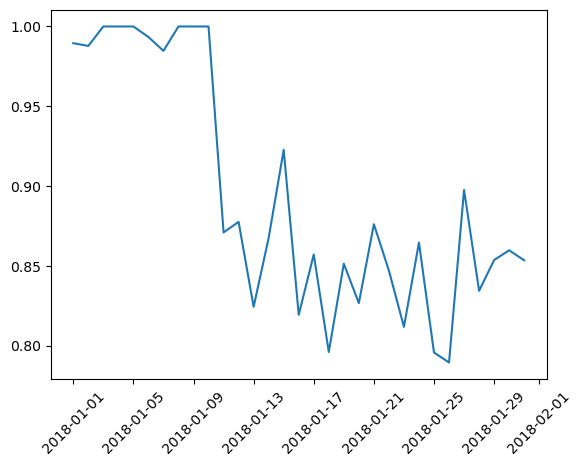

In [31]:
# Добавление столбца 'is_correct_lang'
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'],'Yes', 'No')

# Группировка по 'date_served' и 'is_correct_lang'
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()
language_check_df = pd.DataFrame(language_check.unstack(1)).fillna(0)
# Расчет отношения правильно отражаемых языков к общему числу
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Построение графика
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

**Вывод:** увидим ошибку, что произошла ошибка в отображении языков, которая и повлияла на конверсию House Ads.

Также проверим нет ли этой ошибки для всего датасета

(array([17532., 17536., 17540., 17544., 17548., 17552., 17556., 17560.,
        17563.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

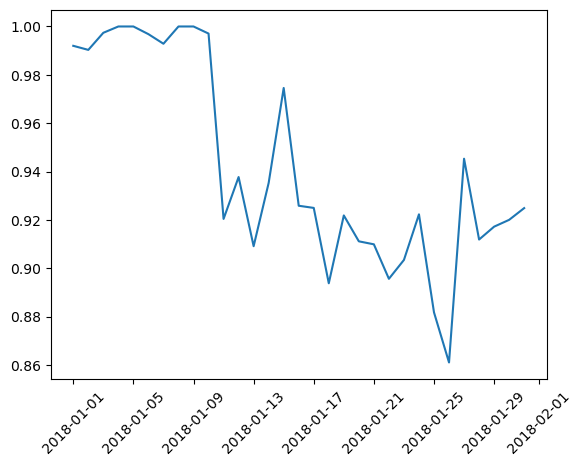

In [32]:
# Добавление столбца с проверкой на правильность показанного языка
marketing['is_correct_lang'] = np.where(marketing['language_displayed'] == marketing['language_preferred'],"Yes", "No")
language_check = marketing.groupby(['date_served', 'is_correct_lang'])['user_id'].count()

# Преобразование результатов в DataFrame и заполнение пропущенных значений нулями
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)

Видно, что ошибка распространяется не только на House Ads, однако повлияла на конверсию именно для этого канала продвижения 

Для анализа масштаба влияний ошибки подсчитаем возможное количество платных подписчиков, если бы не было ошибки

Для этого выделим даты до появления ошибки и рассчитаем как обычно соотносятся конверсии разных языков к конверсии английского языка. Запишем эти результаты в индексы 

In [33]:
# Расчет конверсии до возникновения ошибки
house_ads_without_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_without_bug, 'language_displayed')

display(lang_conv)

# Расчет индексов конверсии на другие языки по сравнению с английским
spanish_index = lang_conv.loc['Spanish'] / lang_conv.loc['English']
arabic_index = lang_conv.loc['Arabic'] / lang_conv.loc['English']
german_index = lang_conv.loc['German'] / lang_conv.loc['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Выведем таблицу с количеством пользователей и платных подписчиков за весь период

In [34]:
# Группировка house_ads по дате и языку
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})

# Использование .pivot чтобы преобразовать таблицу в более удобный формат
converted = converted.reset_index().pivot(index='date_served', columns='language_preferred', values= ['user_id', 'converted'])
converted.head(5)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

В таблицу для удобства продублируем столбец с английскими платными подписчиками и учитывая имеющихся платных подписчиков других языков рассчитаем сколько в каждый день мы могли бы привлечь возможных платных подписчиков 

In [35]:
# Создание столбца 'english_conv_rate' для английской конверсии в затронутый период
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]
# display(converted.iloc[7:15])

# Создание ожидаемых коэффициентов конверсии для каждого языка
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index
# display(converted.iloc[7:15])

# Умножение числа пользователей на ожидаемый коэффициент конверсии
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100 * converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate'] / 100 * converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/ 100 * converted[('user_id','German')]
# display(converted.iloc[7:15])

# Отображение числа потенциальных платных подписчиков в период ошибки 
converted[['expected_spanish_conv', 'expected_arabic_conv', 'expected_german_conv']].query('index > "2018-01-10"')

,expected_spanish_conv,expected_arabic_conv,expected_german_conv
language_preferred,,,
date_served,,,
2018-01-11,1.311901,2.119225,0.538216
2018-01-12,0.555035,0.454120,0.538216
2018-01-13,1.345540,1.513732,1.121283
2018-01-14,1.210986,1.513732,0.807324
2018-01-15,1.009155,0.605493,1.076432
2018-01-16,1.715563,2.119225,1.076432
2018-01-17,0.538216,0.201831,0.269108
2018-01-18,1.513732,1.766021,1.345540


Суммируем всех возможных платных подписчиков, если бы ошибка не произошла

In [36]:
# Выборка данных только для затронутого периода
converted = converted.loc['2018-01-11':'2018-01-31']

# Суммирование возможных платных подписчиков для каждого языка
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Расчет фактического числа платных подписчиков
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Вычисление потерянных платных подписчиков из-за ошибки
lost_subs = expected_subs - actual_subs
lost_subs

32.14414319248826

Рассчитаем какой процент составляет это число от общих возможных подписчиков

In [37]:
# Ограничение датасета на период ошибки
house_ads_bug = house_ads[house_ads['date_served'] >= '2018-01-11']

# Суммирование реальных полученных платных подписчиков
house_ads_bug_subs_sum = house_ads_bug['converted'].sum()

# Суммирование реальных и возможных платных подписчиков
all_expected_subs = house_ads_bug_subs_sum + lost_subs

# Деление всех упущенных платных подписчиков на число всех потенциальных платных подписчиков
lost_subs_rate = lost_subs / all_expected_subs * 100
print(f'Доля возможных платных подписчиков к реальным за период ошибки: {round(lost_subs_rate, 2)}%')

Доля возможных платных подписчиков к реальным за период ошибки: 21.13%


**Вывод:** было потеряно приблизительно 32 возможных платных подписчика или 21.13% от всех возможных платных подписчиков, что является крайне негативным результатом, поскольку фактически каждый 5 платный подписчик был потерян из-за ошибки. Нужно понять, что привело к ошибке и предпринять меры по избеганию ее в будущем.

## Шаг 4. Проведение A/B теста.

В целях увеличения конверсии маркетинговый отдел решил попробовать использовать персонализированные письма, отправляемые рассылкой по электронной почте.<br> 
Всего было отправлено 2 категории писем:
- классические
- персонализированные


Перед проведением теста проверим объем выборки для каждой из категорий писем

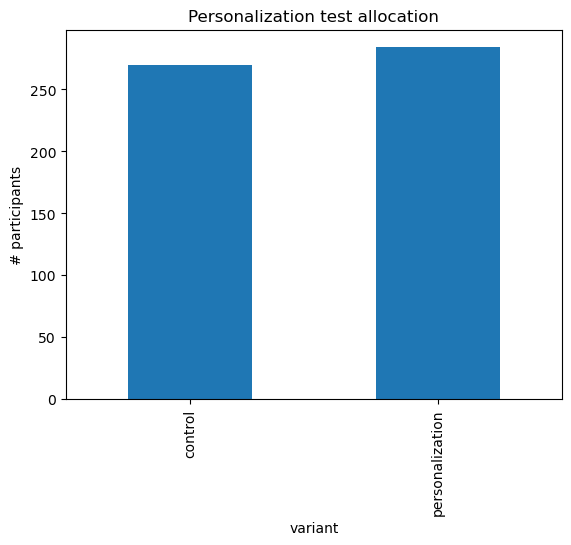

In [38]:
# Выбор канала продвижения "Email"
email = marketing[marketing['marketing_channel'] == 'Email']

# Группировка email по 2 видам писем
alloc = email.groupby('variant')['user_id'].nunique()

# Построение столбчатой диаграммы для проверки равенства выборок
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

Как видно, объем выборок практически одинаковый, поэтому можно проводить тест

Сначала узнаем в среднем по всем пользователям прирост конверсии персонализированных писем по отношению к классическим

Рассчитаем в среднем конверсию по 2 категориям писем

In [39]:
# Группировка marketing по 'user_id' и видам писем
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Удаление пропущенных значений из столбца 'control'
control = subscribers_df['control'].dropna()

# Удаление пропущенных значений из столбца 'personalization'
personalization = subscribers_df['personalization'].dropna()

print(f'Конверсия контрольной группы: {round(control.mean(), 2)}')
print(f'Конверсия персонализированных писем: {round(personalization.mean(), 2)}')

Конверсия контрольной группы: 0.28
Конверсия персонализированных писем: 0.39


Напишем функция для расчета прироста

In [40]:
# Определение функции для расчета прироста
def lift(a,b):
    a_mean = a.mean()
    b_mean = b.mean()
    
    lift = (a_mean - b_mean) / b_mean
  
    return str(round(lift*100, 2)) + '%'

Применим функцию прироста на средние конверсии 2х категорий писем

In [41]:
# Вывод прироста для контрольной и группы с персонализацией
print(f'Прирост конверсии персонализированных писем по отношению к обычным: {lift(personalization,control)}')

Прирост конверсии персонализированных писем по отношению к обычным: 38.85%


**Вывод:** виден положительный результат от персонализации писем и прирост конверсии на 38.85%, однако надо поверить статистическую значимость и результаты по категориям пользователей.

Проверим эти результаты на статистическую значимость. Для этого используем двухвыборочный t-тест с коэффициентом значимости на уровне 0.05

In [42]:
# Импорт функции ttest_ind из библиотеки scipy.stats
from scipy.stats import ttest_ind

In [43]:
# Расчет t-статистики и p-значения
t_statistic, p_value = ttest_ind(control.astype(int), personalization.astype(int))

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.734329944750507
P-value: 0.006451487844694182


Видим, что что P-value = 0.0064, что меньше 0.05, что говорит о статистической значимости. 

Далее проведем A/B-тест для разных категорий пользователей

Для этого создадим функцию:

In [44]:
# Определение функции для сегментации A/B-теста
def ab_segmentation(segment):
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(personalization, control)) 
      print('t-statistic:', ttest_ind(control.astype(int), personalization.astype(int)), '\n\n')

Проведем A/B-тест по языкам

In [45]:
# Применение ab_segmentation к сегменту 'language_displayed'
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




C:\Users\Тимофей\AppData\Local\Temp\ipykernel_20340\2679789689.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', ttest_ind(control.astype(int), personalization.astype(int)), '\n\n')


Видим, что для арабского языка несмотря на прирост конверсии на 50% нет статистической значимости, для немецкого языка - прирост отрицательный и также нет статистической разницы, а для английского и испанского - есть как положительный прирост, так и статистическая значимость  

Проведем A/B-тест по возрасту

In [46]:
# Применение ab_segmentation к сегменту 'age_group'
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788255) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.326565456420339, pvalue=0.0016358623456360468) 




Видим, что для пользователей в возрасте от 30 лет персонализированные письма негативно сказываются на конверсии значительно уменшьая ее, однако у пользователей до 30 лет ситуация обратная - положительный прирост с статистической значимостью.

**Вывод:** целесообразно в дальнейшем использовать персонализированные письма для английской и немецкой аудитории, которая моложе 30 лет.